## Problem Statement

**To predict the price of used car given the data collected from various sources.
To build a model that can assign a price for a vehicle by evaluating car features and other variables which will affect the price of the used car.**

**Independent Variable:**
* Transmission
* Owner Type
* Mileage
* Engine
* Years
* Kilometers Driven
* Fuel Type
* New Price
* Seats
* Location 
<br>

**Dependent Variable:**
* Price

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

### Import data
- A training set which we will split further to train and validation set to train and test the model.

In [2]:
usedcars = pd.read_csv("train-data.csv")

In [3]:
usedcars.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


<hr>

### About Data

<font size="10" face="Calibri">
<table style="width:80%">
<tr>
    <th width="7%">S.N</th>
    <th width="15%">Feature</th>
    <th width="20%" style="text-align:center">Type of Data</th>
    <th width="40%" style="text-align:left">Description</th>
    </tr>
    <tr>
        <th>1</th>
        <td>Name</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The brand and model of the car</td>
        </tr>
    <tr>
        <th>2</th>
        <td>Location</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The location in which the car is being sold or is available for purchase</td>
        </tr>
    <tr>
        <th>3</th>
        <td>Year</td>
        <td style="text-align:center">Numerical -Interval</td>
        <td style="text-align:left">The year or edition of the model</td>
        </tr>
    <tr>
        <th>4</th>
        <td>Kilometers_Driven</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The total kilometres driven in the car by the previous owner(s) in KM</td>
        </tr>
    <tr>
        <th>5</th>
        <td>Fuel_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of fuel used by the car</td>
        </tr>
    <tr>
        <th>6</th>
        <td>Transmission</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of transmission used by the car</td>
        </tr>
    <tr>
        <th>7</th>
        <td>Owner_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">Whether the ownership is Firsthand, Second hand or other</td>
        </tr>
    <tr>
        <th>8</th>
        <td>Mileage</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The standard mileage offered by the car company in kmpl or km/kg</td>
        </tr>
    <tr>
        <th>9</th>
        <td>Engine</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The displacement volume of the engine in CC</td>
        </tr>
    <tr>
        <th>10</th>
        <td>Power</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The maximum power of the engine in bhp</td>
        </tr>
    <tr>
        <th>11</th>
        <td>Seats</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The number of seats in the car</td>
        </tr>
    <tr>
        <th>12</th>
        <td>New_Price</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The price of a new car of the same model</td>
        </tr>
    <tr>
        <th>13</th>
        <td>Price</td>
        <td style="text-align:center">Numeriical -Ratio</td>
        <td style="text-align:left">The price of the used car in INR Lakhs</td>
    </tr>
</table>

In [4]:
usedcars.shape

(6019, 14)

In [5]:
print("Used Cars Dataset: ")
print("Number of Rows: ", usedcars.shape[0])
print("Number of columns: ", usedcars.shape[1])

Used Cars Dataset: 
Number of Rows:  6019
Number of columns:  14


In [6]:
usedcars.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [8]:
usedcars.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
usedcars.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [10]:
list(usedcars["Name"].unique())

['Maruti Wagon R LXI CNG',
 'Hyundai Creta 1.6 CRDi SX Option',
 'Honda Jazz V',
 'Maruti Ertiga VDI',
 'Audi A4 New 2.0 TDI Multitronic',
 'Hyundai EON LPG Era Plus Option',
 'Nissan Micra Diesel XV',
 'Toyota Innova Crysta 2.8 GX AT 8S',
 'Volkswagen Vento Diesel Comfortline',
 'Tata Indica Vista Quadrajet LS',
 'Maruti Ciaz Zeta',
 'Honda City 1.5 V AT Sunroof',
 'Maruti Swift VDI BSIV',
 'Land Rover Range Rover 2.2L Pure',
 'Land Rover Freelander 2 TD4 SE',
 'Mitsubishi Pajero Sport 4X4',
 'Honda Amaze S i-Dtech',
 'Maruti Swift DDiS VDI',
 'Renault Duster 85PS Diesel RxL Plus',
 'Mercedes-Benz New C-Class C 220 CDI BE Avantgare',
 'BMW 3 Series 320d',
 'Maruti S Cross DDiS 200 Alpha',
 'Audi A6 2011-2015 35 TFSI Technology',
 'Hyundai i20 1.2 Magna',
 'Volkswagen Vento Petrol Highline AT',
 'Honda City Corporate Edition',
 'Maruti Alto K10 2010-2014 VXI',
 'Honda WRV i-VTEC VX',
 'Toyota Innova 2.5 V Diesel 7-seater',
 'Renault Duster 110PS Diesel RxZ Pack',
 'Toyota Corolla Altis

In [11]:
np.array(usedcars["Location"].unique())

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [12]:
np.array(usedcars["Year"].unique())

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [13]:
np.array(usedcars["Fuel_Type"].unique())

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [14]:
np.array(usedcars["Transmission"].unique())

array(['Manual', 'Automatic'], dtype=object)

In [15]:
np.array(usedcars["Owner_Type"].unique())

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [16]:
np.array(usedcars["Mileage"].unique())

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [17]:
kmkg = 0
kmpl = 0
for i in usedcars.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print("The number of rows with unit km/kg : ", kmkg)
print("The number of rows with unit kmpl : ", kmpl)

The number of rows with unit km/kg :  66
The number of rows with unit kmpl :  5951


In [18]:
usedcars[usedcars["Fuel_Type"].isin(["CNG","LPG"])]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


Here, we can see that the unit for mileage is km/kg is for the Fuel_Type LPG and CNG.
So, we will be converting the values with unit km/kg to kmpl by following conversion factors.

1 litre of CNG ~ 0.18 kg
<br>

1 litre of LPG ~ 0.55 kg

In [19]:
np.array(usedcars["Engine"].unique())

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [20]:
np.array(usedcars["Power"].unique())

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [21]:
usedcars[usedcars["Power"] == "null bhp"]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,NaN,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70


In [22]:
np.array(usedcars["Seats"].unique())

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

<hr>

1. The variable "Unnamed: 0" will be removed as it is giving the index of the each row and not adding any useful information.
<br>

3. The variables "Mileage", "Engine" and "Power" have the units in each observation. We have to remove these units.
<br>

4. The variable "Power" has some values as "null bhp",we have to convert them into na values.
<br>

5. The data type for variables "Mileage", "Power" and "Engine" is object. We have to change the datatype of these vaiables to suitable datatype that is float. 
<br>

2. The variable "Mileage" has two units we have to convert the data such that this variable will have single unit.
<br>

6. Seats variable have data type float we have to convert the data type as int as number of seats represnts discrete numerical values. 
<br>

7. The variable New_Price has around 5195 null values that is 86.31% of the data is missing and that's why we will be removing this variable as well.

<hr>

### Data Cleaning

In [23]:
usedcars.duplicated().sum()

0

1.

In [24]:
usedcars = usedcars.drop(columns = ["Unnamed: 0", "New_Price"])

3.

In [25]:
usedcars["Mileage"] = usedcars["Mileage"].str.split(" ", n = 1, expand = True)[0]

usedcars["Engine"] = usedcars["Engine"].str.split(" ", n = 1, expand = True)[0]

usedcars["Power"] = usedcars["Power"].str.split(" ", n = 1, expand = True)[0]

usedcars["Company_Name"] = usedcars["Name"].str.split(" ", n = 1, expand = True)[0]
usedcars["Model_Name"] = usedcars["Name"].str.split(" ", n = 2, expand = True)[1]

In [26]:
usedcars.loc[usedcars.Company_Name == "Isuzu", "Company_Name"] = "ISUZU"

4.

In [27]:
usedcars[usedcars["Power"] == "null"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,2.00,Ford,Fiesta
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30,Hyundai,Santro
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,2.10,Hyundai,Santro
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,0.85,Hyundai,Santro
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,1.67,Hyundai,Santro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0,1086,null,5.0,1.20,Hyundai,Santro
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,null,NaN,1.75,Maruti,Estilo
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5,1798,null,5.0,2.85,Skoda,Laura
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null,6.0,1.70,Mahindra,Jeep


In [28]:
usedcars["Power"].replace(to_replace = "null", value = np.nan, inplace = True)

In [29]:
usedcars["Power"].isnull().sum()

143

5.

In [30]:
usedcars["Mileage"] = pd.to_numeric(usedcars["Mileage"], errors = "coerce", downcast = "float")
usedcars["Engine"] = pd.to_numeric(usedcars["Engine"], errors = "coerce", downcast = "float")
usedcars["Power"] = pd.to_numeric(usedcars["Power"], errors = "coerce", downcast = "float")
usedcars["Seats"] = pd.to_numeric(usedcars["Seats"], errors = "coerce", downcast = "integer")

2.

In [31]:
n=0
for i in usedcars['Fuel_Type']:
    if i == 'CNG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
    elif i == 'LPG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81
    n = n+1

<ipython-input-31-bdc1c82524ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
<ipython-input-31-bdc1c82524ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81


In [32]:
usedcars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,147.630005,998.0,58.160000,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.199997,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200001,1199.0,88.699997,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.760002,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.800003,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,4.75,Maruti,Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,4.00,Hyundai,Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,2.90,Mahindra,Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,2.65,Maruti,Wagon


<hr>

## Outlier 

### Missing value Imputation

In [33]:
usedcars.describe(include = "all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000,6019,6019
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,30,212
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,Maruti,Swift
freq,49,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN,1211,353
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,19.237419,1621.276489,113.253502,5.278735,9.479468,NaN,NaN
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,13.045972,601.354309,53.875046,0.808840,11.187917,NaN,NaN
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200001,0.000000,0.440000,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.260000,1198.000000,75.000000,5.000000,3.500000,NaN,NaN
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.190001,1493.000000,97.699997,5.000000,5.640000,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1984.000000,138.100006,5.000000,9.950000,NaN,NaN


1...........................

In [34]:
usedcars.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Company_Name           0
Model_Name             0
dtype: int64

In [35]:
usedcars["Mileage"].replace(to_replace = 0.0, value = np.nan, inplace = True)

In [36]:
usedcars["Seats"].replace(to_replace = 0.0, value = np.nan, inplace = True)

In [37]:
usedcars.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
Company_Name           0
Model_Name             0
dtype: int64

1.

In [38]:
usedcars[usedcars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,2.95,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.100000,NaN,NaN,NaN,2.11,Maruti,Swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.100000,NaN,NaN,NaN,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,26.50,Land,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.800000,NaN,NaN,NaN,3.20,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.100000,NaN,NaN,NaN,5.80,Maruti,Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,1.50,Honda,City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,40.88,Land,Rover
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.100000,NaN,NaN,NaN,3.15,Maruti,Swift
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,NaN,1.93,Hyundai,Santro


In [39]:
usedcars[(usedcars.Name == "Honda City 1.5 GXI")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,2.95,Honda,City
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,1.50,Honda,City
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,2.30,Honda,City
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,1.10,Honda,City
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,1.85,Honda,City


In [40]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Name"])["Engine"].transform("median"))

In [41]:
usedcars.Engine.isnull().sum()

31

In [42]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission","Fuel_Type"])["Engine"].transform("median"))

In [43]:
usedcars.Engine.isnull().sum()

2

In [44]:
usedcars[usedcars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,40.88,Land,Rover
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.299999,NaN,NaN,NaN,2.60,Fiat,Punto


In [45]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission"])["Engine"].transform("median"))

In [46]:
usedcars[usedcars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,40.88,Land,Rover


In [47]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Engine"].transform("median"))

In [48]:
usedcars.Engine.isnull().sum()

0

2.

In [49]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.000000,5.0,17.50,Land,Rover
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.000000,5.0,35.67,Mercedes-Benz,C-Class
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,NaN,1086.0,NaN,5.0,1.30,Hyundai,Santro
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,1493.0,NaN,NaN,2.95,Honda,City
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,1498.0,99.000000,NaN,3.60,Ford,Figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,NaN,2446.0,NaN,8.0,2.20,Toyota,Qualis
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,NaN,1950.0,194.000000,5.0,35.00,Mercedes-Benz,C-Class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,NaN,2112.0,NaN,6.0,1.70,Mahindra,Jeep
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,NaN,1086.0,62.000000,5.0,1.39,Hyundai,Santro


In [50]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Name"])["Mileage"].transform("median"))

In [51]:
usedcars.Mileage.isnull().sum()

67

In [52]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type","Transmission","Engine"])["Mileage"].transform("median"))

In [53]:
usedcars.Mileage.isnull().sum()

20

In [54]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.000000,5.0,35.67,Mercedes-Benz,C-Class
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,NaN,1950.0,181.429993,5.0,38.99,Mercedes-Benz,New
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,NaN,1950.0,194.000000,5.0,39.50,Mercedes-Benz,C-Class
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,NaN,999.0,NaN,5.0,1.60,Hyundai,Santro
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,2179.0,NaN,NaN,40.88,Land,Rover
1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,NaN,999.0,NaN,5.0,2.20,Hyundai,Santro
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,NaN,2498.0,NaN,6.0,6.99,Mahindra,Jeep
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,NaN,999.0,NaN,5.0,3.48,Hyundai,Santro
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,NaN,999.0,NaN,5.0,2.30,Hyundai,Santro


In [55]:
usedcars[(usedcars.Company_Name == "Mercedes-Benz") & (usedcars.Model_Name == "C-Class") & (usedcars.Fuel_Type == "Diesel")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.67,Mercedes-Benz,C-Class
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,39.50,Mercedes-Benz,C-Class
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.00,Mercedes-Benz,C-Class


In [56]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

19

In [57]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Mileage"].transform("median"))

In [58]:
usedcars.Mileage.isnull().sum()

9

In [59]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.67,Mercedes-Benz,C-Class
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,39.50,Mercedes-Benz,C-Class
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,NaN,2498.0,NaN,6.0,6.99,Mahindra,Jeep
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra,E
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,NaN,1242.0,NaN,5.0,0.55,Fiat,Siena
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,NaN,1950.0,194.0,5.0,35.00,Mercedes-Benz,C-Class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,NaN,2112.0,NaN,6.0,1.70,Mahindra,Jeep


In [60]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

4

In [61]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,NaN,2112.0,NaN,6.0,1.70,Mahindra,Jeep


In [62]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Fuel_Type"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

3

In [63]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius


In [64]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Fuel_Type"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

3

In [65]:
usedcars[usedcars.Company_Name == "Smart"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.0,Smart,Fortwo


In [66]:
usedcars = usedcars.dropna(subset = ["Mileage"])

3.

In [67]:
usedcars[usedcars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.799999,1399.0,NaN,5.0,2.00,Ford,Fiesta
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,17.000000,1086.0,NaN,5.0,1.30,Hyundai,Santro
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.000000,1086.0,NaN,5.0,2.10,Hyundai,Santro
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.000000,1086.0,NaN,5.0,0.85,Hyundai,Santro
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.000000,1086.0,NaN,5.0,1.67,Hyundai,Santro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.000000,1086.0,NaN,5.0,1.20,Hyundai,Santro
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.500000,1061.0,NaN,NaN,1.75,Maruti,Estilo
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.500000,1798.0,NaN,5.0,2.85,Skoda,Laura
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,15.100000,2112.0,NaN,6.0,1.70,Mahindra,Jeep


In [68]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Name"])["Power"].transform("median"))

<ipython-input-68-63cd196609c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Name"])["Power"].transform("median"))


In [69]:
usedcars.Power.isnull().sum()

112

In [70]:
usedcars[(usedcars.Name == "Ford Fiesta 1.4 SXi TDCi")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.799999,1399.0,NaN,5.0,2.0,Ford,Fiesta
3290,Ford Fiesta 1.4 SXi TDCi,Hyderabad,2008,83000,Diesel,Manual,Second,17.799999,1399.0,NaN,5.0,2.4,Ford,Fiesta


In [71]:
usedcars[(usedcars.Company_Name == "Hyundai") & (usedcars.Model_Name == "Santro") & (usedcars.Year == 2012) & (usedcars.Transmission == "Manual")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,17.00,1086.0,NaN,5.0,3.35,Hyundai,Santro
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,17.00,999.0,NaN,5.0,3.48,Hyundai,Santro
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,17.00,1086.0,NaN,NaN,3.25,Hyundai,Santro
3279,Hyundai Santro Xing GLS,Coimbatore,2012,43337,Petrol,Manual,First,17.92,1086.0,62.099998,5.0,3.32,Hyundai,Santro
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,17.00,1086.0,NaN,NaN,2.66,Hyundai,Santro
3922,Hyundai Santro Xing GL Plus,Pune,2012,79000,Petrol,Manual,Second,17.92,1086.0,62.099998,5.0,1.60,Hyundai,Santro
4215,Hyundai Santro Xing GL Plus,Delhi,2012,53000,Petrol,Manual,First,17.92,1086.0,62.099998,5.0,2.35,Hyundai,Santro
4302,Hyundai Santro Xing GL,Delhi,2012,61449,Petrol,Manual,First,17.00,1086.0,62.000000,5.0,2.15,Hyundai,Santro


In [72]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Year","Transmission","Fuel_Type","Engine"])["Power"].transform("median"))

<ipython-input-72-91b1900ec80e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Year","Transmission","Fuel_Type","Engine"])["Power"].transform("median"))


In [73]:
usedcars["Power"].isnull().sum()

61

In [74]:
usedcars[usedcars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,17.00,1086.0,NaN,5.0,1.30,Hyundai,Santro
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,Hyundai,Santro
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,17.00,1086.0,NaN,5.0,1.75,Hyundai,Santro
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.50,Hyundai,Santro
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,19.33,1968.0,NaN,5.0,5.45,Volkswagen,Jetta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,13.10,2446.0,NaN,8.0,2.20,Toyota,Qualis
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,Hyundai,Santro
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75,Maruti,Estilo
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,Skoda,Laura


In [75]:
usedcars[(usedcars.Company_Name == "Hyundai") & (usedcars.Model_Name == "Santro") & (usedcars.Transmission == "Manual") & (usedcars.Year == 2012) & (usedcars.Fuel_Type == "Petrol")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,17.00,1086.0,62.099998,5.0,3.35,Hyundai,Santro
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,17.00,999.0,NaN,5.0,3.48,Hyundai,Santro
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,17.00,1086.0,62.099998,NaN,3.25,Hyundai,Santro
3279,Hyundai Santro Xing GLS,Coimbatore,2012,43337,Petrol,Manual,First,17.92,1086.0,62.099998,5.0,3.32,Hyundai,Santro
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,17.00,1086.0,62.099998,NaN,2.66,Hyundai,Santro
3922,Hyundai Santro Xing GL Plus,Pune,2012,79000,Petrol,Manual,Second,17.92,1086.0,62.099998,5.0,1.60,Hyundai,Santro
4215,Hyundai Santro Xing GL Plus,Delhi,2012,53000,Petrol,Manual,First,17.92,1086.0,62.099998,5.0,2.35,Hyundai,Santro
4302,Hyundai Santro Xing GL,Delhi,2012,61449,Petrol,Manual,First,17.00,1086.0,62.000000,5.0,2.15,Hyundai,Santro


In [76]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission","Fuel_Type"])["Power"].transform("median"))

<ipython-input-76-0c06505836c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission","Fuel_Type"])["Power"].transform("median"))


In [77]:
usedcars["Power"].isnull().sum()

26

In [78]:
usedcars[usedcars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.000000,3436.0,NaN,2.0,40.00,Porsche,Cayman
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,17.000000,999.0,NaN,5.0,1.60,Hyundai,Santro
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.500000,1242.0,NaN,5.0,0.85,Fiat,Petra
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,12.700000,2179.0,NaN,NaN,40.88,Land,Rover
1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,17.000000,999.0,NaN,5.0,2.20,Hyundai,Santro
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.000000,2148.0,NaN,5.0,5.00,Mercedes-Benz,E-Class
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,14.000000,2498.0,NaN,6.0,6.99,Mahindra,Jeep
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,17.000000,999.0,NaN,5.0,3.48,Hyundai,Santro
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.000000,3436.0,NaN,2.0,43.00,Porsche,Cayman
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,17.000000,999.0,NaN,5.0,2.30,Hyundai,Santro


In [79]:
usedcars[(usedcars.Company_Name == "Hyundai") & (usedcars.Model_Name == "Santro") & (usedcars.Transmission == "Manual") & (usedcars.Year == 2012) & (usedcars.Fuel_Type == "Petrol")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,17.00,1086.0,62.099998,5.0,3.35,Hyundai,Santro
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,17.00,999.0,NaN,5.0,3.48,Hyundai,Santro
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,17.00,1086.0,62.099998,NaN,3.25,Hyundai,Santro
3279,Hyundai Santro Xing GLS,Coimbatore,2012,43337,Petrol,Manual,First,17.92,1086.0,62.099998,5.0,3.32,Hyundai,Santro
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,17.00,1086.0,62.099998,NaN,2.66,Hyundai,Santro
3922,Hyundai Santro Xing GL Plus,Pune,2012,79000,Petrol,Manual,Second,17.92,1086.0,62.099998,5.0,1.60,Hyundai,Santro
4215,Hyundai Santro Xing GL Plus,Delhi,2012,53000,Petrol,Manual,First,17.92,1086.0,62.099998,5.0,2.35,Hyundai,Santro
4302,Hyundai Santro Xing GL,Delhi,2012,61449,Petrol,Manual,First,17.00,1086.0,62.000000,5.0,2.15,Hyundai,Santro


In [80]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission"])["Power"].transform("median"))

<ipython-input-80-966506631a86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission"])["Power"].transform("median"))


In [81]:
usedcars["Power"].isnull().sum()

24

In [82]:
usedcars[usedcars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,40.00,Porsche,Cayman
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,17.0,999.0,NaN,5.0,1.60,Hyundai,Santro
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,0.85,Fiat,Petra
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,12.7,2179.0,NaN,NaN,40.88,Land,Rover
1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,17.0,999.0,NaN,5.0,2.20,Hyundai,Santro
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,5.00,Mercedes-Benz,E-Class
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,14.0,2498.0,NaN,6.0,6.99,Mahindra,Jeep
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,17.0,999.0,NaN,5.0,3.48,Hyundai,Santro
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,43.00,Porsche,Cayman
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,17.0,999.0,NaN,5.0,2.30,Hyundai,Santro


In [83]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Fuel_Type"])["Power"].transform("median"))

<ipython-input-83-301bc47a5cfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Fuel_Type"])["Power"].transform("median"))


In [84]:
usedcars["Power"].isnull().sum()

20

In [85]:
usedcars[usedcars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,40.00,Porsche,Cayman
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,17.0,999.0,NaN,5.0,1.60,Hyundai,Santro
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,0.85,Fiat,Petra
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,12.7,2179.0,NaN,NaN,40.88,Land,Rover
1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,17.0,999.0,NaN,5.0,2.20,Hyundai,Santro
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,14.0,2498.0,NaN,6.0,6.99,Mahindra,Jeep
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,17.0,999.0,NaN,5.0,3.48,Hyundai,Santro
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,43.00,Porsche,Cayman
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,17.0,999.0,NaN,5.0,2.30,Hyundai,Santro
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,1.50,Maruti,Estilo


In [86]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Power"].transform("median"))

<ipython-input-86-77363b3d2bc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Power"].transform("median"))


In [87]:
usedcars["Power"].isnull().sum()

16

In [88]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Fuel_Type","Transmission"])["Power"].transform("median"))

<ipython-input-88-d5638e18dbd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Fuel_Type","Transmission"])["Power"].transform("median"))


In [89]:
usedcars["Power"].isnull().sum()

2

In [90]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name"])["Power"].transform("median"))

<ipython-input-90-445da8c4b1cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name"])["Power"].transform("median"))


In [91]:
usedcars["Power"].isnull().sum()

0

In [92]:
usedcars[usedcars["Power"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name


In [93]:
usedcars = usedcars.dropna(subset = ["Power"])

In [94]:
usedcars["Power"].isnull().sum()

0

4. Seats


In [95]:
usedcars[usedcars.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,12.800000,1493.0,100.000000,NaN,2.95,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.100000,1197.0,85.000000,NaN,2.11,Maruti,Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,25.830000,1498.0,99.000000,NaN,3.60,Ford,Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.100000,1197.0,81.800003,NaN,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,12.700000,2179.0,187.699997,NaN,26.50,Land,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.800000,1497.0,118.000000,NaN,3.20,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.100000,1197.0,83.139999,NaN,5.80,Maruti,Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,12.800000,1493.0,100.000000,NaN,1.50,Honda,City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,12.700000,2179.0,187.699997,NaN,40.88,Land,Rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.000000,1493.0,100.000000,NaN,1.70,Honda,City


In [96]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Name"])["Seats"].transform("median"))

In [97]:
usedcars.Seats.isnull().sum()

37

In [98]:
usedcars[usedcars.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.100000,1197.0,85.000000,NaN,2.11,Maruti,Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,25.830000,1498.0,99.000000,NaN,3.60,Ford,Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.100000,1197.0,81.800003,NaN,1.75,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,12.700000,2179.0,187.699997,NaN,26.50,Land,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.800000,1497.0,118.000000,NaN,3.20,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.100000,1197.0,83.139999,NaN,5.80,Maruti,Swift
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,12.700000,2179.0,187.699997,NaN,40.88,Land,Rover
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.100000,1197.0,85.800003,NaN,3.15,Maruti,Swift
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,17.000000,1086.0,62.099998,NaN,1.93,Hyundai,Santro
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.100000,1197.0,83.139999,NaN,4.70,Maruti,Swift


In [99]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Fuel_Type"])["Seats"].transform("median"))

In [100]:
usedcars.Seats.isnull().sum()

6

In [101]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine"])["Seats"].transform("median"))

In [102]:
usedcars.Seats.isnull().sum()

4

In [103]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Seats"].transform("median"))

In [104]:
usedcars.Seats.isnull().sum()

3

In [105]:
usedcars[usedcars.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.50,Maruti,Estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,2.50,Maruti,Estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.75,Maruti,Estilo


In [106]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name"])["Seats"].transform("median"))

In [107]:
usedcars.Seats.isnull().sum()

0

In [108]:
usedcars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company_Name         0
Model_Name           0
dtype: int64

### Data Visualization

In [109]:
quant = [f for f in usedcars.columns if usedcars.dtypes[f] != 'object']

qual = [f for f in usedcars.columns if usedcars.dtypes[f] == 'object']

In [110]:
quant

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [111]:
qual

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Company_Name',
 'Model_Name']

### Univariate

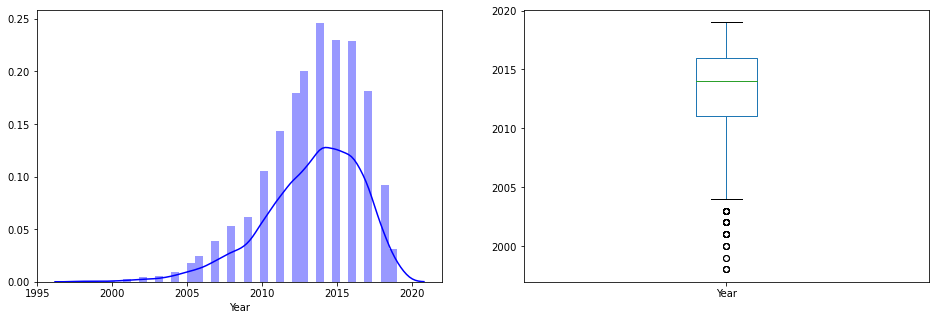

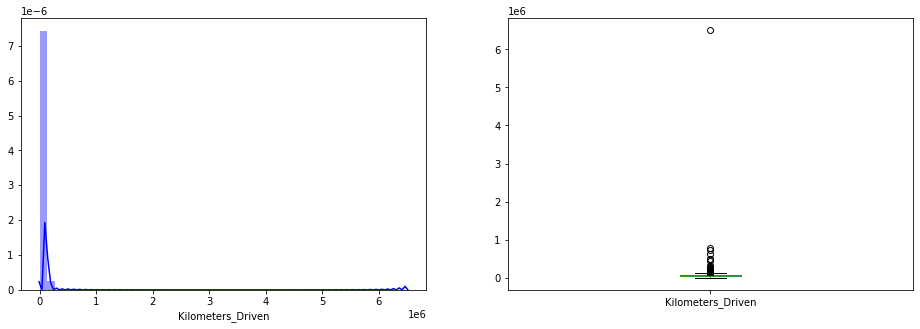

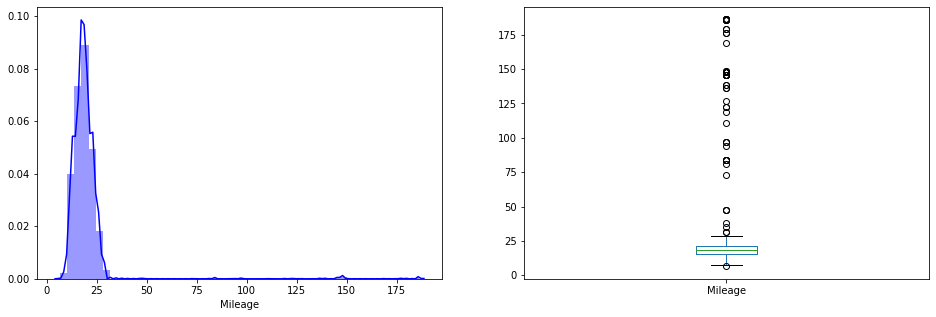

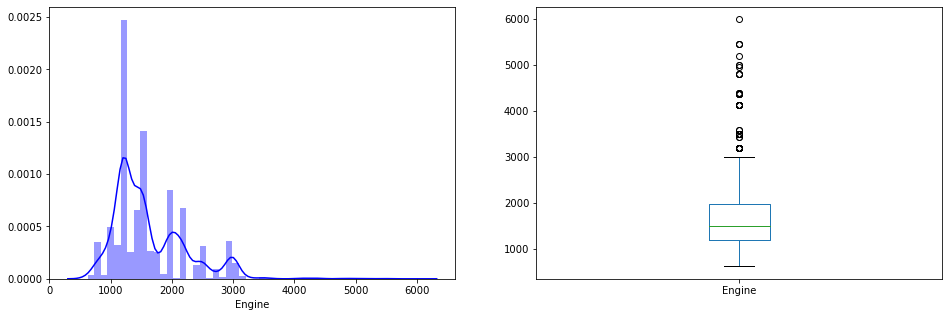

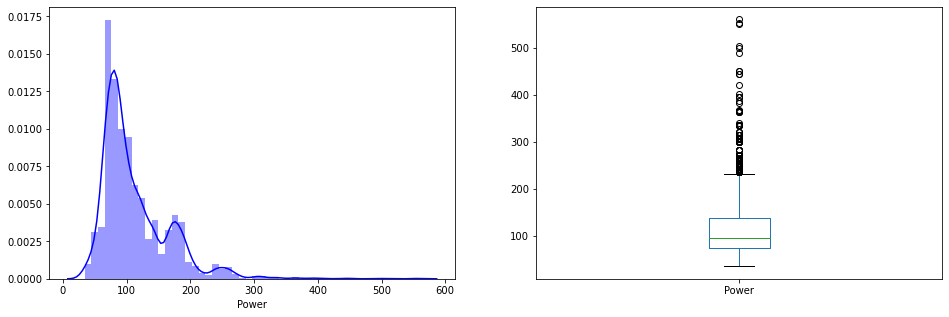

C:\Users\Pradnya\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


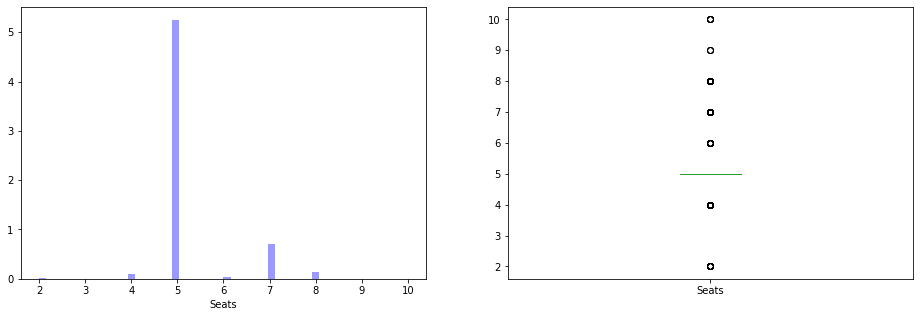

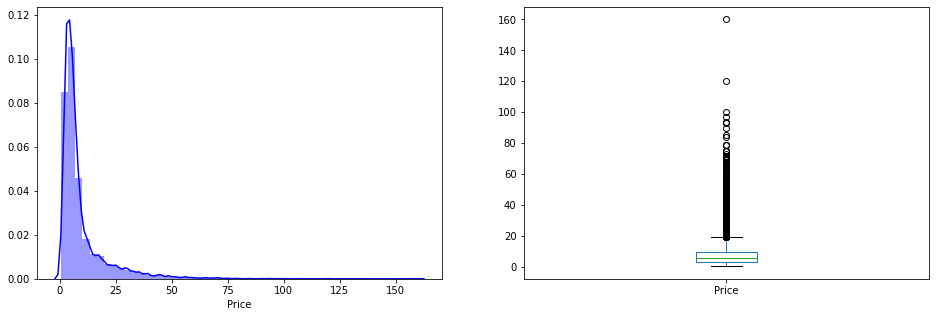

In [112]:
for i in quant:
    plt.subplot(121)
    sns.distplot(usedcars[i],color="b");

    plt.subplot(122)
    usedcars[i].plot.box(figsize=(16,5))

    plt.show()

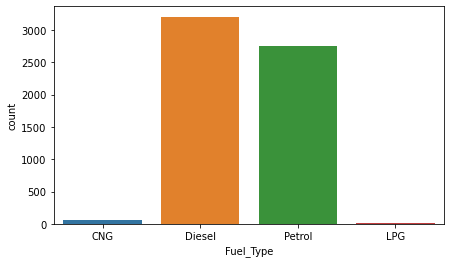

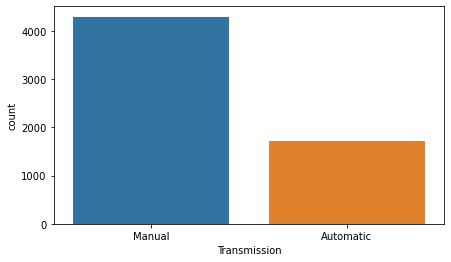

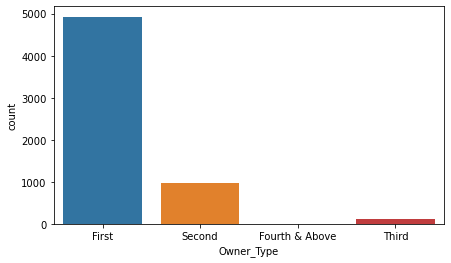

In [113]:
for i in ['Fuel_Type','Transmission','Owner_Type']:
    plt.figure(figsize=(7, 4))
    sns.countplot(x = i , data = usedcars)
    plt.show()

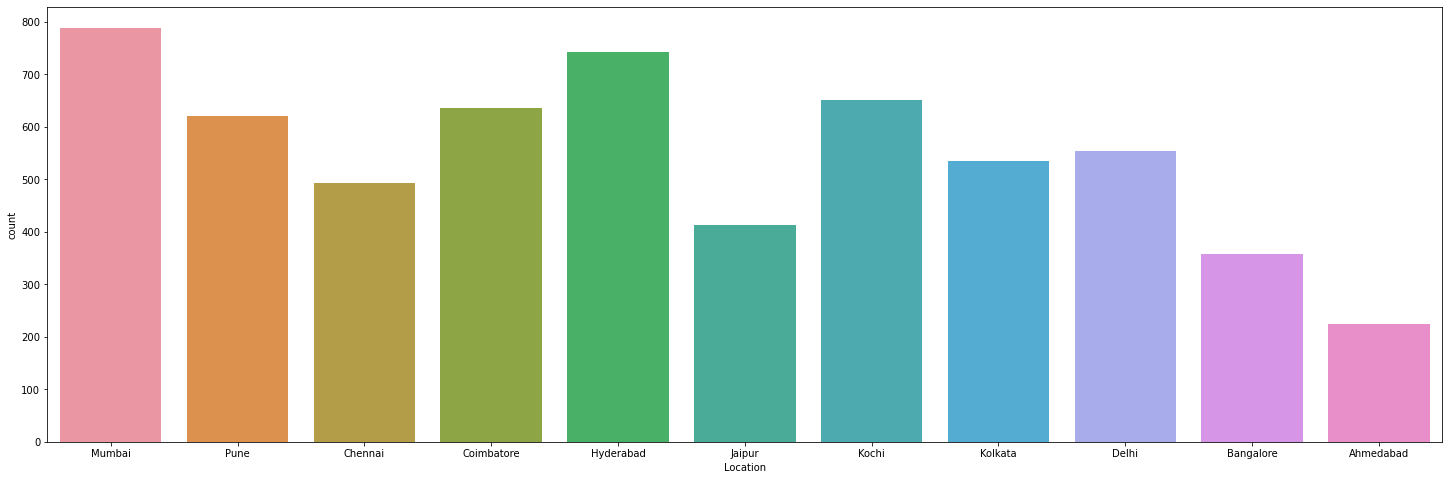

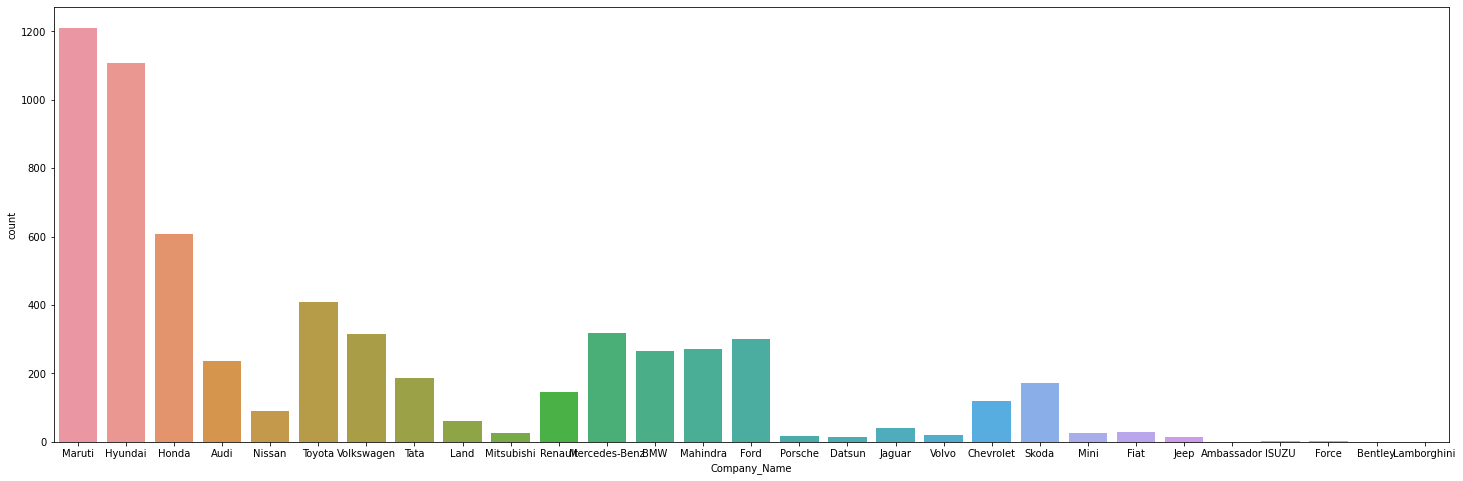

In [114]:
for i in ["Location", "Company_Name"]:
    plt.figure(figsize=(25, 8))
    sns.countplot(x = i , data = usedcars)
    plt.show()

#### Bivariate

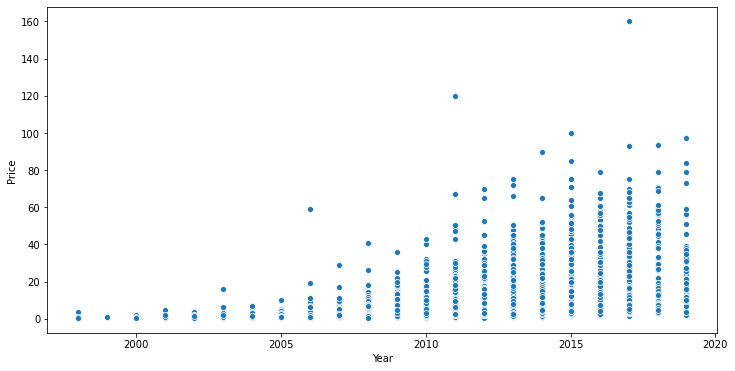

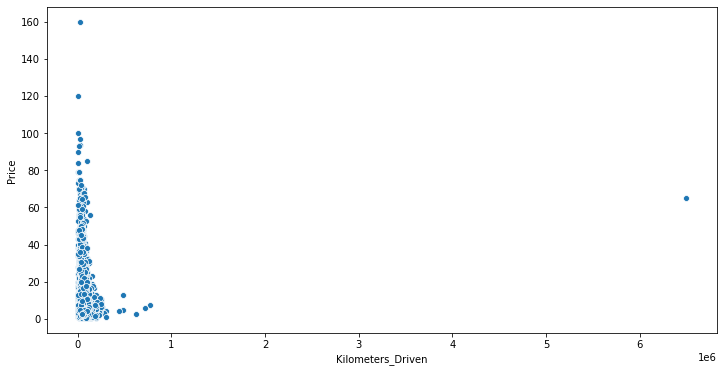

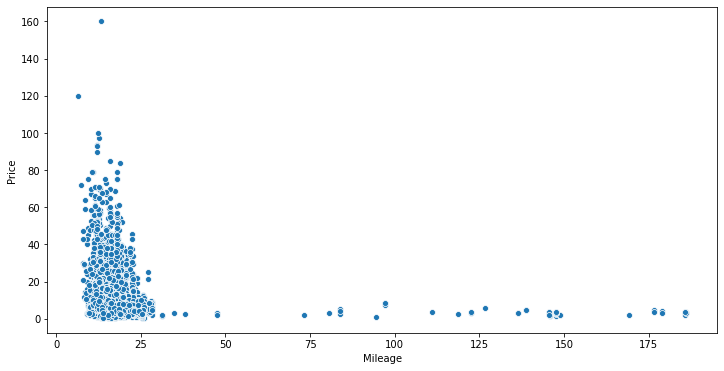

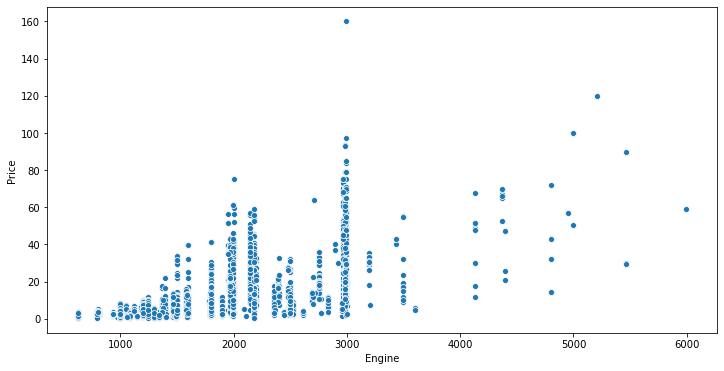

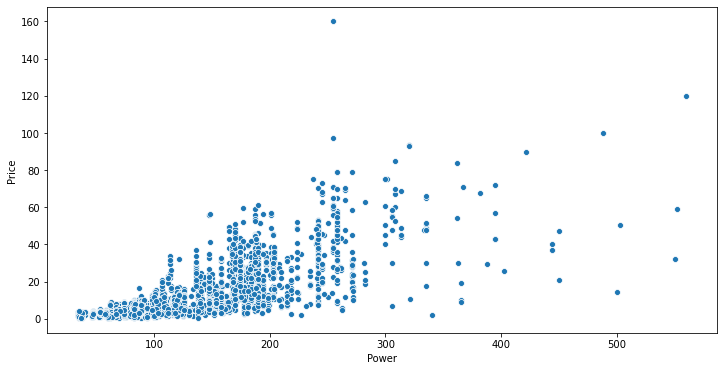

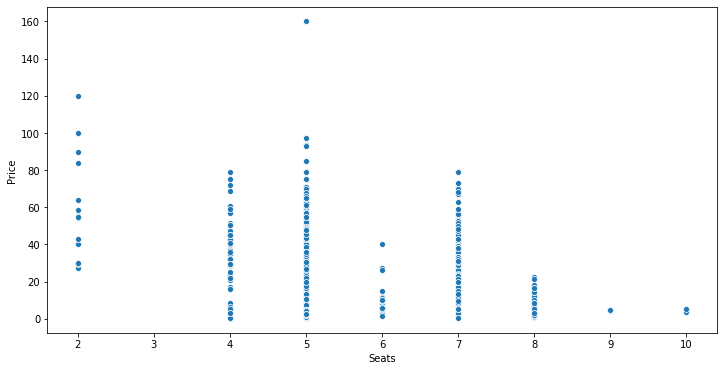

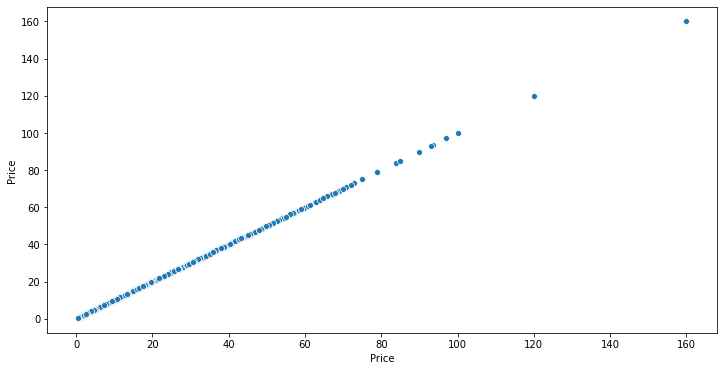

In [115]:
for i in quant:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = usedcars[i], y = usedcars["Price"])

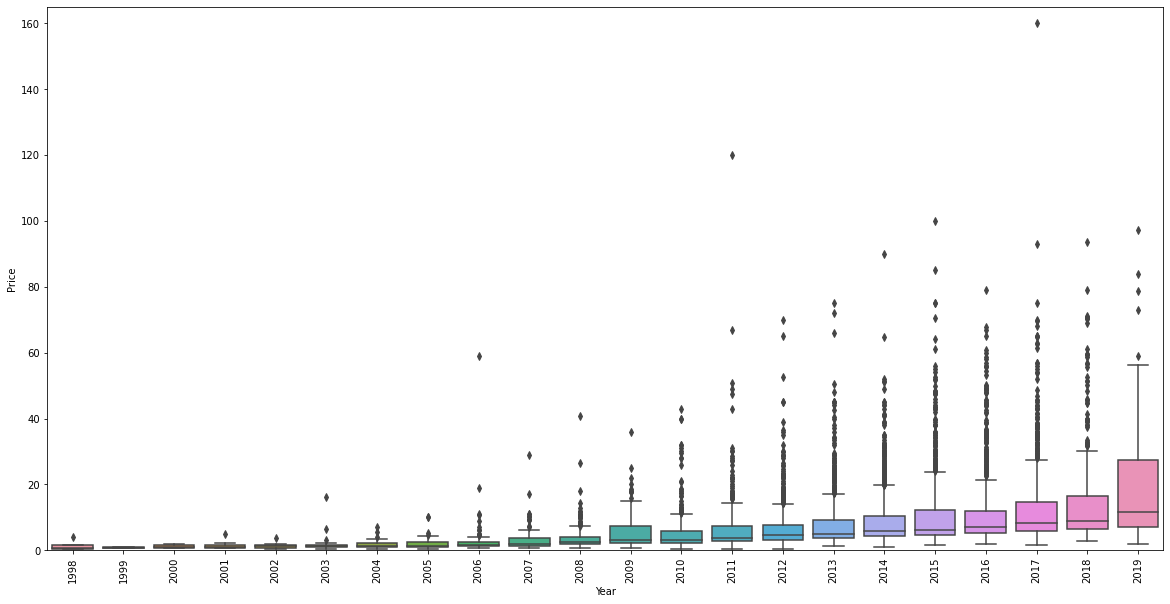

In [116]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Year", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

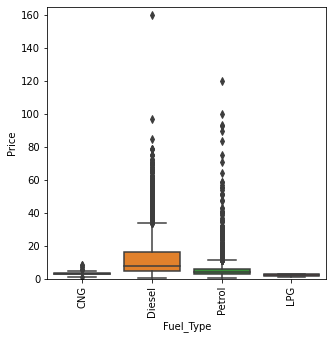

In [117]:
plt.figure(figsize=(5, 5))
fig = sns.boxplot(x = "Fuel_Type", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

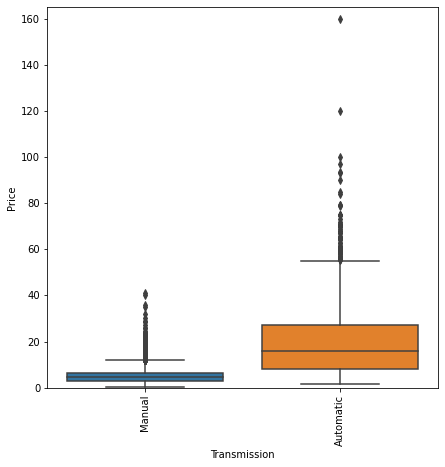

In [118]:
plt.figure(figsize=(7, 7))
fig = sns.boxplot(x = "Transmission", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

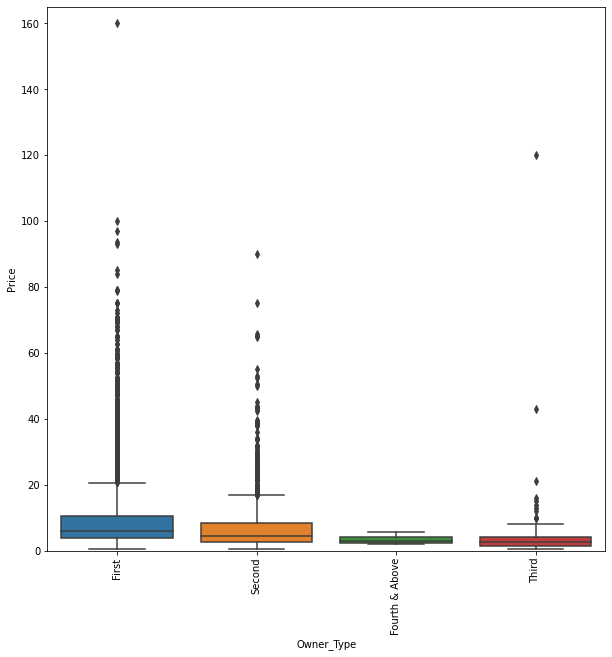

In [119]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Owner_Type", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

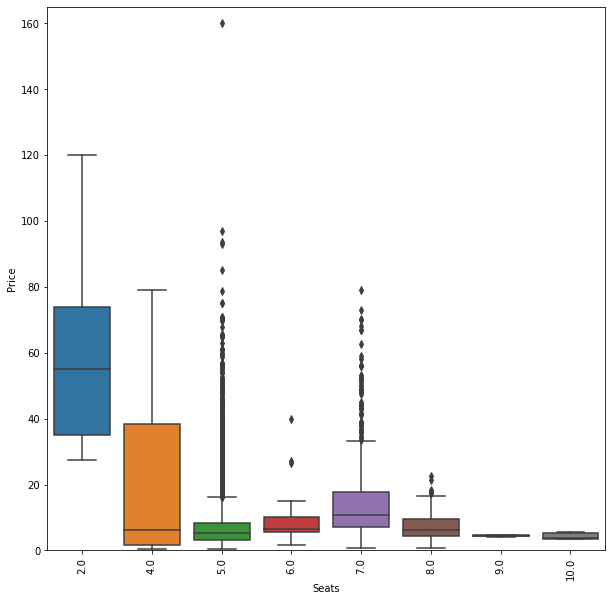

In [120]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Seats", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

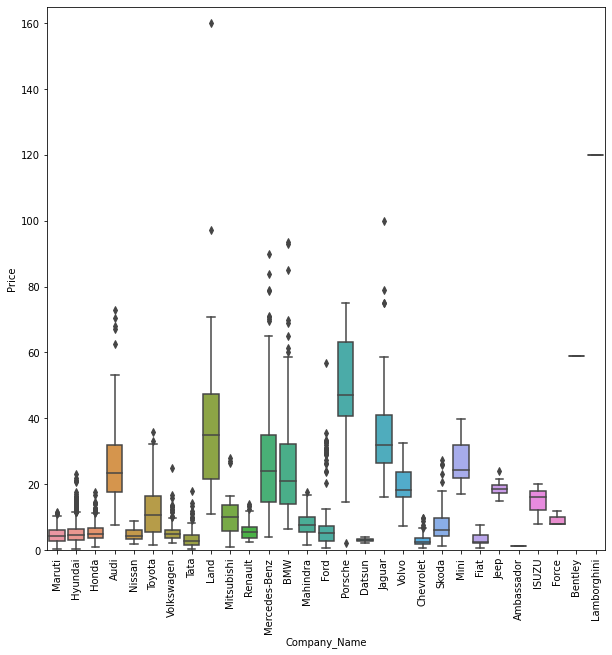

In [121]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Company_Name", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

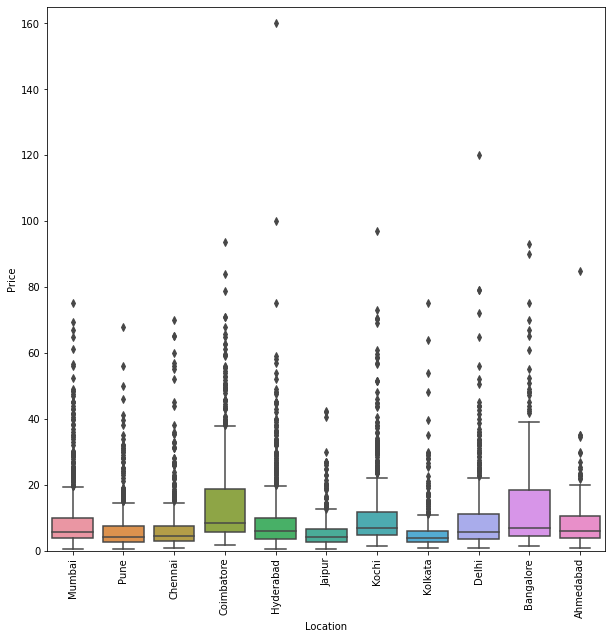

In [122]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Location", y="Price", data=usedcars)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=90)
plt.show()

## Multivariate

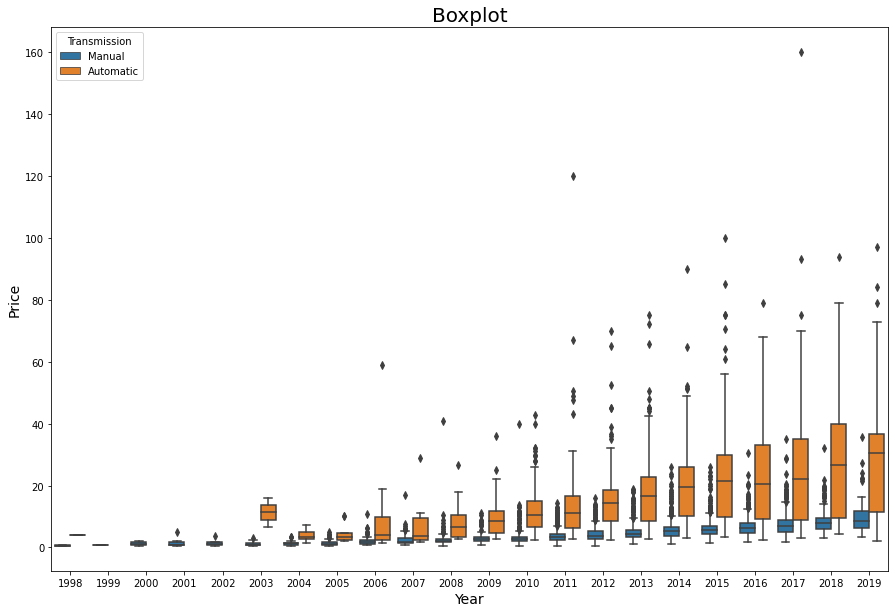

In [123]:
plt.figure(figsize=(15,10))
sns.boxplot(data=usedcars, x="Year", y="Price", hue='Transmission')
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

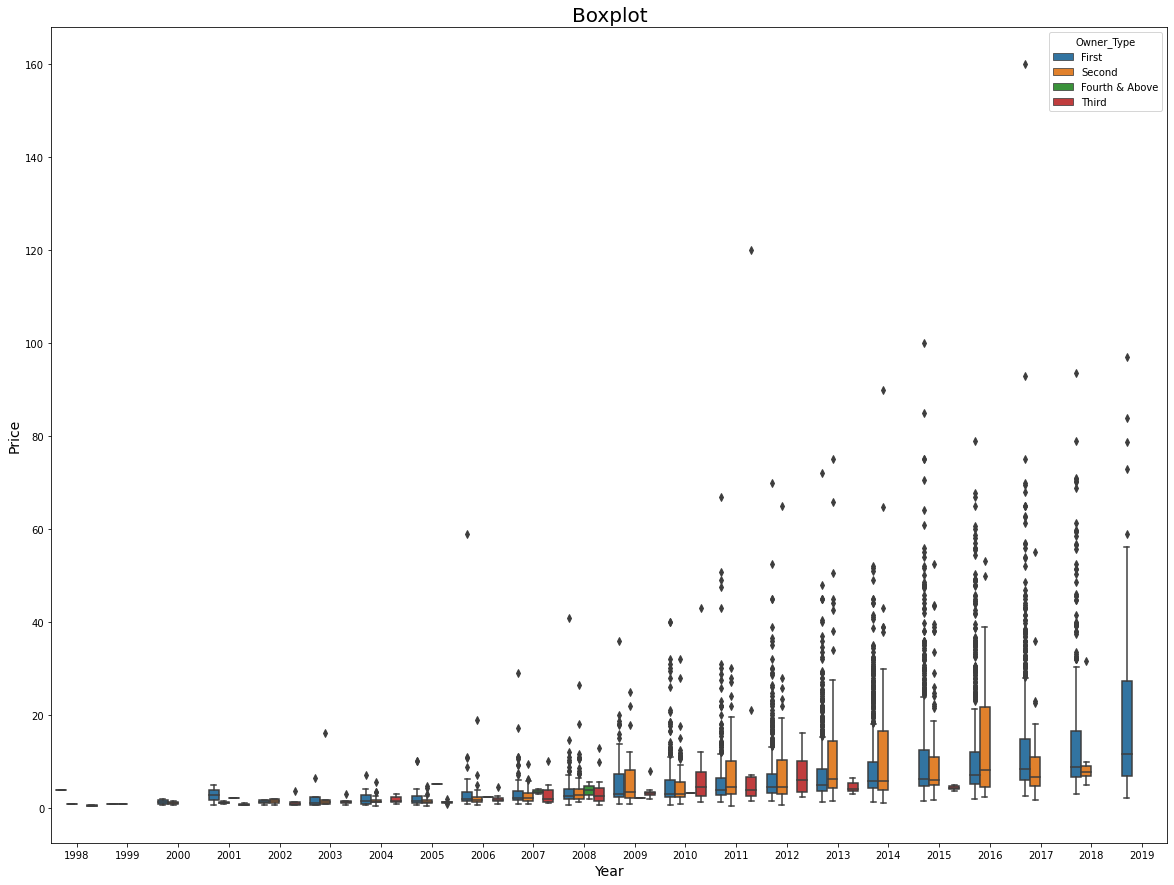

In [124]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Year", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

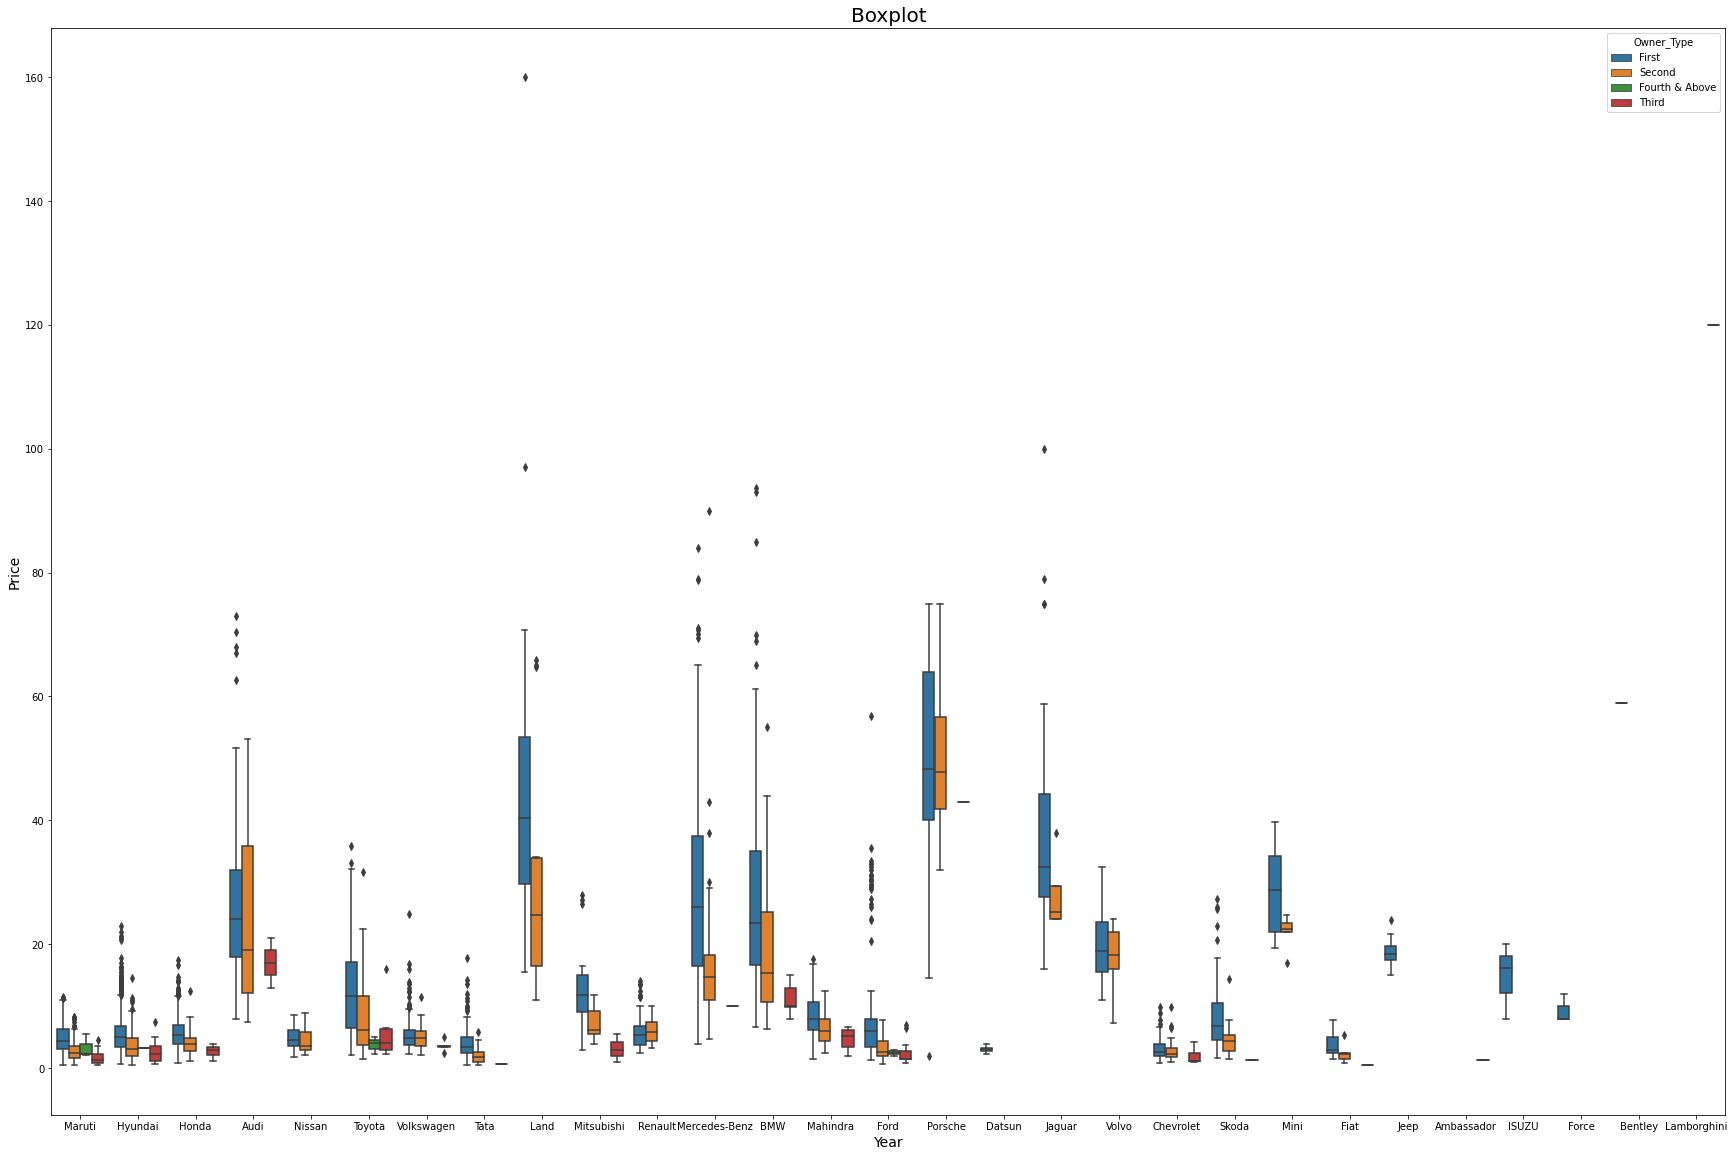

In [125]:
plt.figure(figsize=(30,20))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

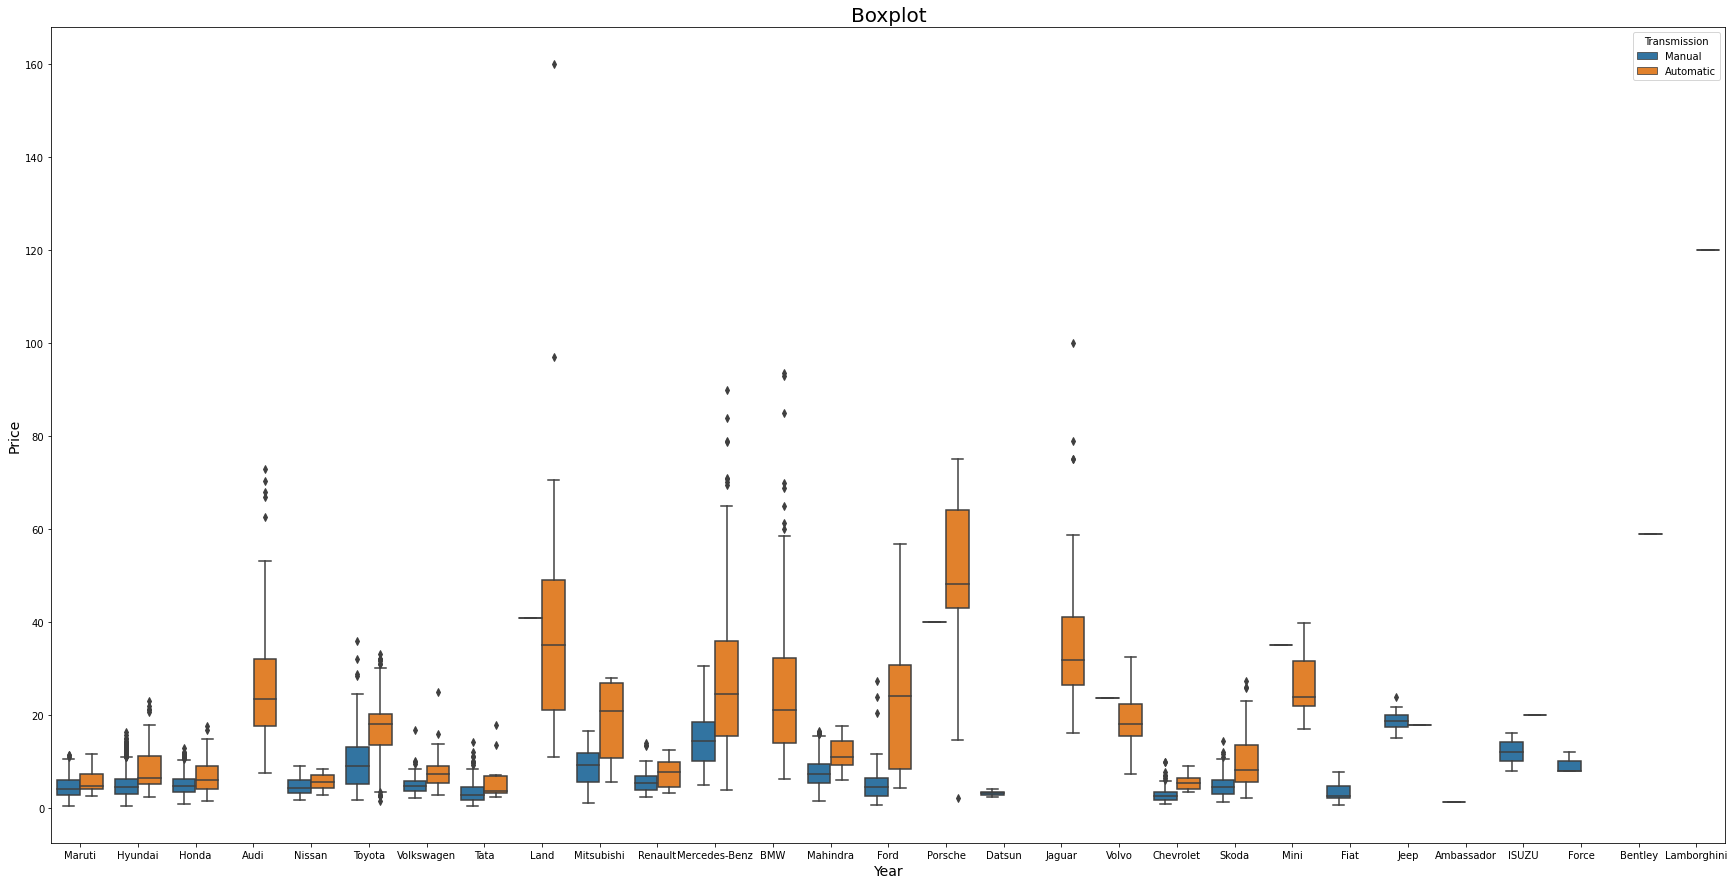

In [126]:
plt.figure(figsize=(30,15))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

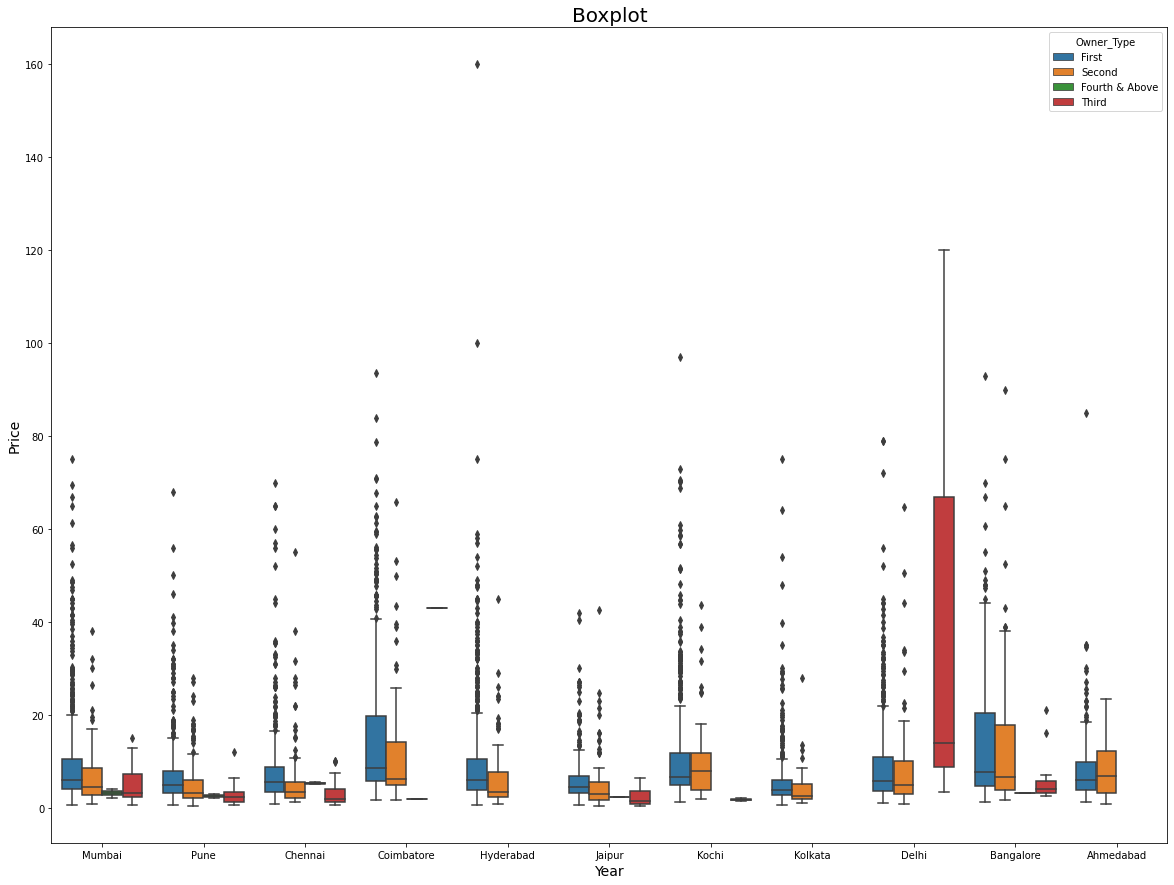

In [127]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

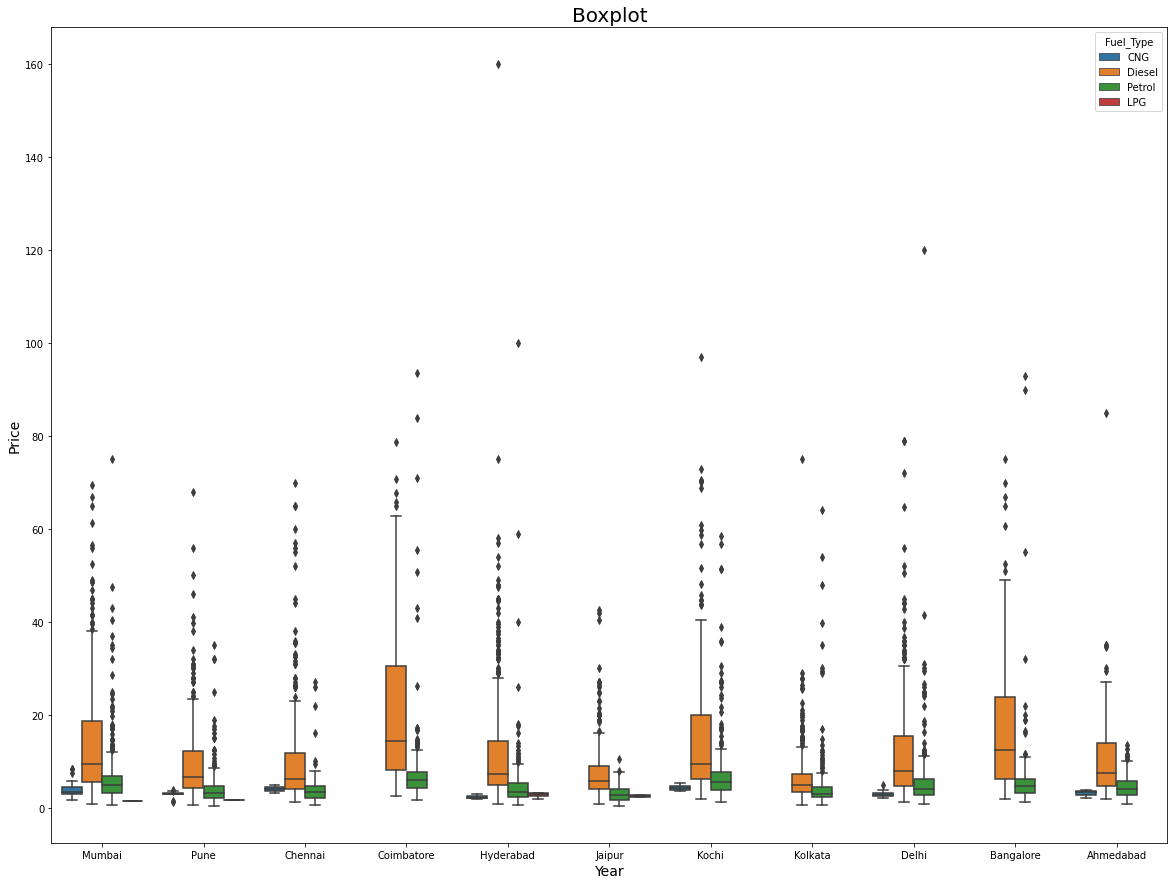

In [128]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Fuel_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

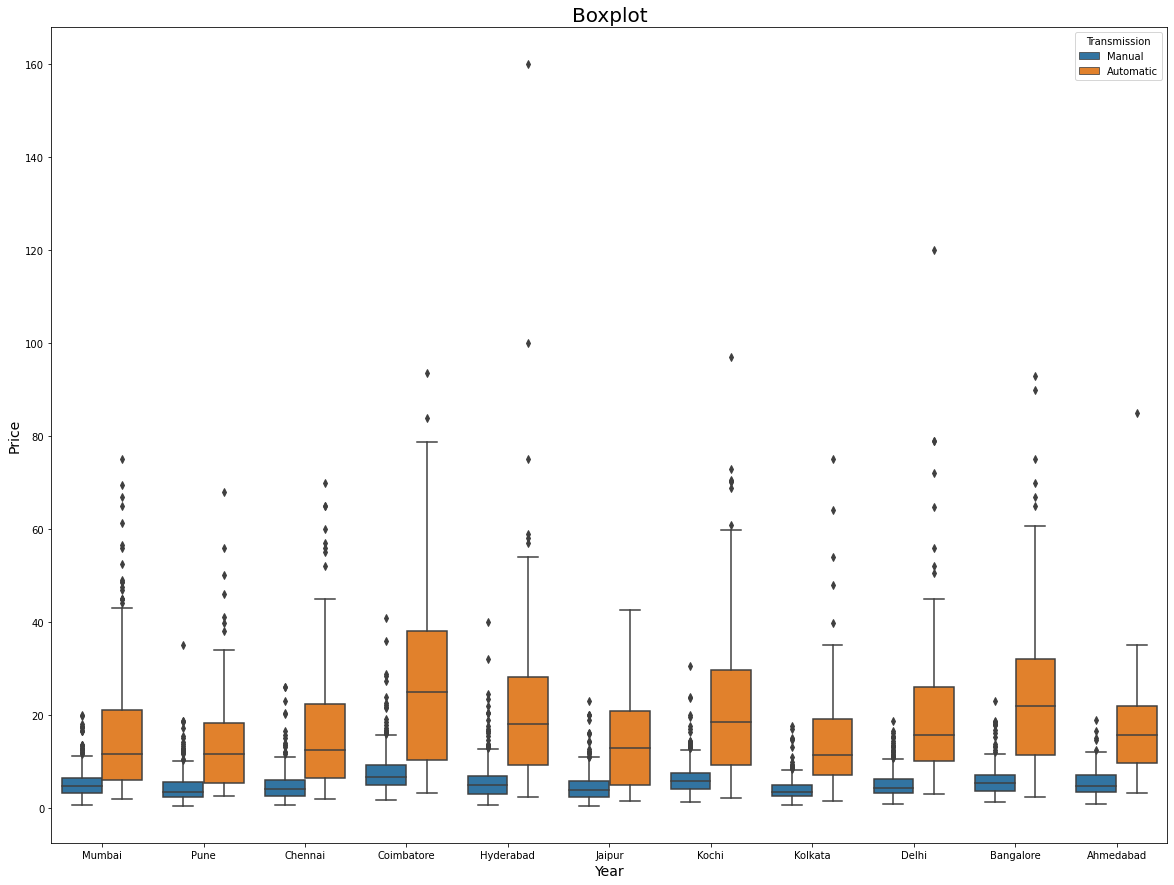

In [129]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

### Label Encoding

In [130]:
print(usedcars['Location'].unique())
print(usedcars['Fuel_Type'].unique())
print(usedcars['Transmission'].unique())
print(usedcars['Owner_Type'].unique())
print(usedcars['Year'].unique())
print(usedcars['Company_Name'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Ambassador' 'ISUZU' 'Force' 'Bentley' 'Lamborghini']


In [131]:
usedcars['Company_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               3
Bentley             1
Lamborghini         1
Ambassador          1
Name: Company_Name, dtype: int64

In [132]:
mean_price_company = pd.DataFrame(usedcars.groupby("Company_Name")['Price'].mean())
mean_price_company = mean_price_company.sort_values(by=['Price'])
#mean_price_company.reset_index(inplace=True)
print(mean_price_company)

                    Price
Company_Name             
Ambassador       1.350000
Chevrolet        3.044463
Datsun           3.049231
Fiat             3.269286
Tata             3.562849
Maruti           4.517267
Nissan           4.738352
Volkswagen       5.307270
Hyundai          5.343433
Honda            5.411743
Renault          5.799034
Ford             6.889400
Skoda            7.559075
Mahindra         8.027638
Force            9.333333
Mitsubishi      11.058889
Toyota          11.577171
ISUZU           14.696667
Jeep            18.718667
Volvo           18.802857
BMW             25.243146
Audi            25.537712
Mercedes-Benz   26.809874
Mini            26.896923
Jaguar          37.632250
Land            39.259500
Porsche         48.348333
Bentley         59.000000
Lamborghini    120.000000


In [133]:
usedcars["Owner_Type"].value_counts()

First             4927
Second             967
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [134]:
mean_price_owner = pd.DataFrame(usedcars.groupby("Owner_Type")['Price'].mean())
mean_price_owner = mean_price_owner.sort_values(by=['Price'])
#mean_price_company.reset_index(inplace=True)
print(mean_price_owner)

                   Price
Owner_Type              
Fourth & Above  3.280000
Third           5.007257
Second          7.604643
First           9.961262


In [135]:
usedcars.replace({"First":4,"Second":3,"Third": 2,"Fourth & Above":1},inplace=True)

<b>Numbers have been assigned to brands in such a manner that brand which have higher mean prices got higher number. For 
eg Lamborghini have highest mean price so got the largest number.</b>

In [136]:
usedcars.replace({'Ambassador':1,'Datsun':2, 'Chevrolet':3, 'Fiat':4, 'Tata':5, 'Maruti':6, 'Nissan':7, 'Volkswagen':8, 
                'Honda':9, 'Hyundai':10, 'Renault':11, 'Ford':12, 'Skoda':13, 'Mahindra':14, 'Force':15, 'Mitsubishi':16, 'Toyota':17, 
                'ISUZU':18, 'Jeep':19, 'Volvo':20, 'BMW':21, 'Audi':22, 'Mercedes-Benz':23, 'Mini':24, 'Jaguar':25, 'Land':26, 'Porsche':26,
                'Bentley':27, 'Lamborghini':28},inplace=True)

In [137]:
Fuel_Type = pd.get_dummies(usedcars["Fuel_Type"])
Transmission = pd.get_dummies(usedcars["Transmission"])

In [138]:
Fuel_Type

,CNG,Diesel,LPG,Petrol
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
6014,0,1,0,0
6015,0,1,0,0
6016,0,1,0,0
6017,0,0,0,1


In [139]:
Transmission

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
6014,0,1
6015,0,1
6016,0,1
6017,0,1


In [140]:
usedcars = pd.concat([usedcars,Transmission,Fuel_Type],axis=1)

In [141]:
usedcars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Automatic,Manual,CNG,Diesel,LPG,Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,4,147.630005,998.0,58.160000,5.0,1.75,6,Wagon,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,4,19.670000,1582.0,126.199997,5.0,12.50,10,Creta,0,1,0,1,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,4,18.200001,1199.0,88.699997,5.0,4.50,9,Jazz,0,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,4,20.770000,1248.0,88.760002,7.0,6.00,6,Ertiga,0,1,0,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,3,15.200000,1968.0,140.800003,5.0,17.74,22,A4,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,4,28.400000,1248.0,74.000000,5.0,4.75,6,Swift,0,1,0,1,0,0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,4,24.400000,1120.0,71.000000,5.0,4.00,10,Xcent,0,1,0,1,0,0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,3,14.000000,2498.0,112.000000,8.0,2.90,14,Xylo,0,1,0,1,0,0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,4,18.900000,998.0,67.099998,5.0,2.65,6,Wagon,0,1,0,0,0,1


In [142]:
usedcars['Year'] = usedcars['Year'].apply(lambda x : 2020 - x)

In [143]:
usedcars1 = usedcars.drop(["Name","Location","Fuel_Type","Transmission","Model_Name"], axis=1)

In [144]:
usedcars1

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Automatic,Manual,CNG,Diesel,LPG,Petrol
0,10,72000,4,147.630005,998.0,58.160000,5.0,1.75,6,0,1,1,0,0,0
1,5,41000,4,19.670000,1582.0,126.199997,5.0,12.50,10,0,1,0,1,0,0
2,9,46000,4,18.200001,1199.0,88.699997,5.0,4.50,9,0,1,0,0,0,1
3,8,87000,4,20.770000,1248.0,88.760002,7.0,6.00,6,0,1,0,1,0,0
4,7,40670,3,15.200000,1968.0,140.800003,5.0,17.74,22,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6,27365,4,28.400000,1248.0,74.000000,5.0,4.75,6,0,1,0,1,0,0
6015,5,100000,4,24.400000,1120.0,71.000000,5.0,4.00,10,0,1,0,1,0,0
6016,8,55000,3,14.000000,2498.0,112.000000,8.0,2.90,14,0,1,0,1,0,0
6017,7,46000,4,18.900000,998.0,67.099998,5.0,2.65,6,0,1,0,0,0,1


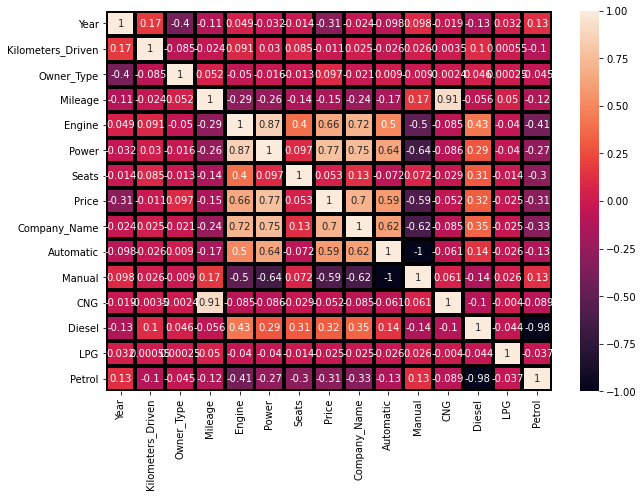

In [145]:
plt.figure(figsize=(10,7))
sns.heatmap(usedcars1.corr(), annot=True, linewidths=3, linecolor='black')
plt.show()

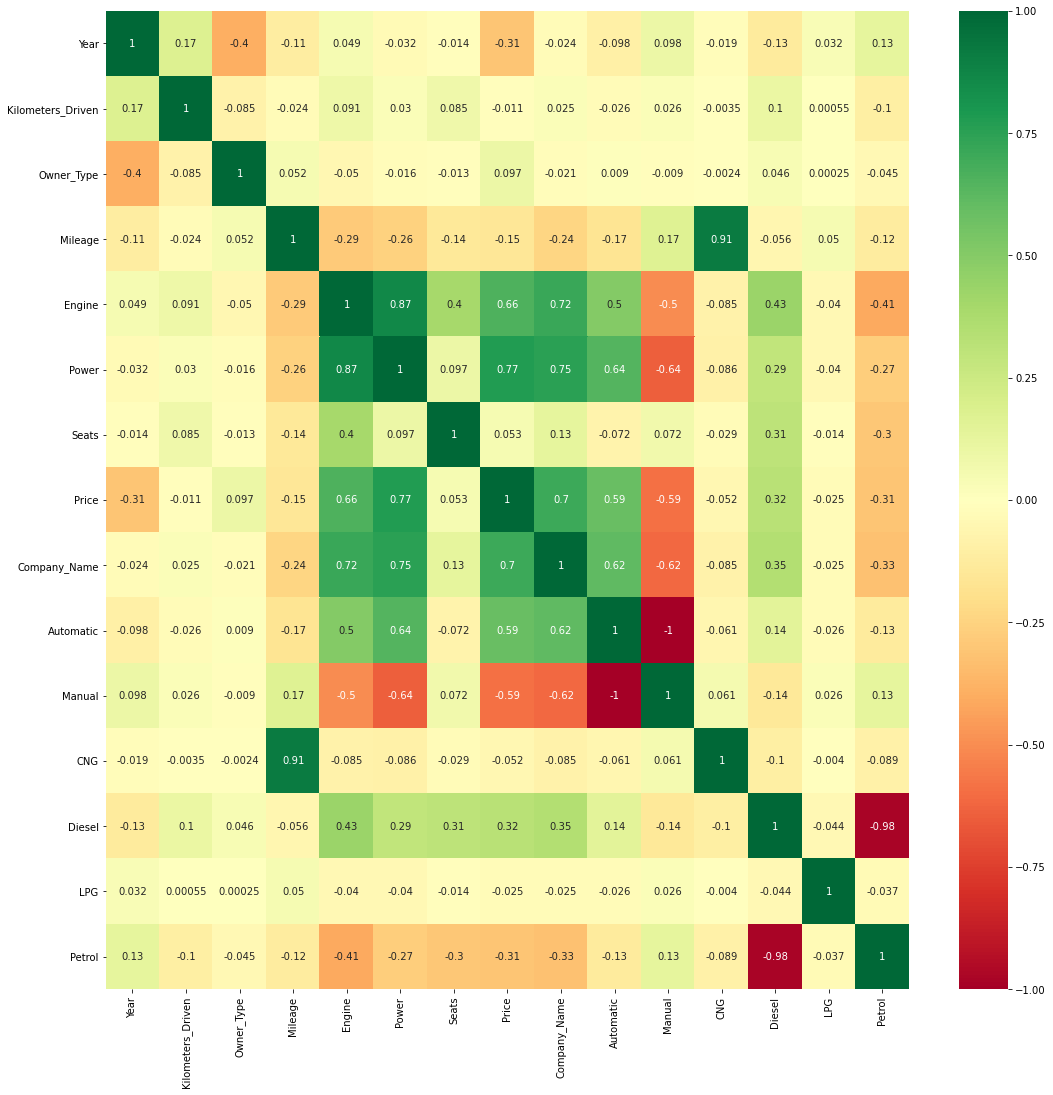

In [146]:
plt.figure(figsize=(18,18))
sns.heatmap(usedcars1.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [157]:
usedcars1_X = usedcars1.drop(["Price"], axis = 1)
usedcars1_y = usedcars1["Price"]

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test=train_test_split(usedcars1_X, usedcars1_y, test_size=0.3,random_state=100)

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [161]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1= model1.predict(X_test)
print("Accuracy on Traing set: ",model1.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model1.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  71.02942979684914 %
Accuracy on Testing set:  73.6495035250353 %


In [162]:
usedcars2_X = usedcars1.drop(["Price","CNG","LPG","Seats"], axis = 1)
usedcars2_y = usedcars1["Price"]

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test=train_test_split(usedcars2_X, usedcars2_y, test_size=0.3,random_state=100)

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [166]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1= model1.predict(X_test)
print("Accuracy on Traing set: ",model1.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model1.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  70.7630285324407 %
Accuracy on Testing set:  73.90185368261916 %


In [167]:
usedcars2_X = usedcars1.drop(["Price","CNG","LPG","Seats","Owner_Type"], axis = 1)
usedcars2_y = usedcars1["Price"]

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test=train_test_split(usedcars2_X, usedcars2_y, test_size=0.3,random_state=100)

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [171]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1= model1.predict(X_test)
print("Accuracy on Traing set: ",model1.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model1.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  70.75816634169658 %
Accuracy on Testing set:  73.94259598250892 %
